In [2]:
import scipy.stats as sts
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def normal_distribution(a = -1, sigma = 1, n_points = 100):
    """Модулирует выборку из N независ наблюдений по нормальному закону распределения
    a - среднее значение
    sigma - стандартное отклонение
    """
    distribution = sts.norm.rvs(loc = a, scale = sigma, size = n_points)
    return distribution
data = normal_distribution()
data

array([-0.87557129, -1.43271941,  0.01762572,  0.30272465, -2.18723634,
       -1.39963209, -0.98527735, -1.07490365, -1.3524101 , -0.73104356,
        0.60695872, -0.17436111, -1.32766331, -0.6318549 , -2.02005019,
       -0.69924261,  0.61331673, -0.7042315 , -1.8252515 , -0.94947166,
       -0.83951644, -0.45393329, -0.34186296, -0.26673204, -1.54020095,
       -0.29091592,  1.25627313, -0.97532628, -0.58779209,  0.13601453,
       -2.41261793,  0.75320386, -1.39152477, -2.567402  , -1.12198906,
       -1.10724488, -1.29998499, -2.04737842, -0.33148243,  0.05935822,
       -0.73548759, -1.59297207, -1.85280665, -3.30813576,  0.3732397 ,
       -0.30659586, -0.37538115, -1.19423637, -0.43168899, -2.32265294,
       -1.68683055, -1.04724922,  0.1736254 ,  2.46186375, -0.07797714,
       -0.76338624,  0.68357308, -1.40128456, -1.67445365,  0.27908578,
       -0.08092728, -2.81377754, -1.08077107, -1.80942408, -0.57003562,
       -1.0851464 , -2.40716092, -1.84582575,  0.99064973, -0.59

Интервалы: [-3.30813576  2.46186375]
Частоты по интервалам: [100]
Сумма абсолютных частот: 100
Относительные частоты: [1.]
Сумма относительных частот: 1.0


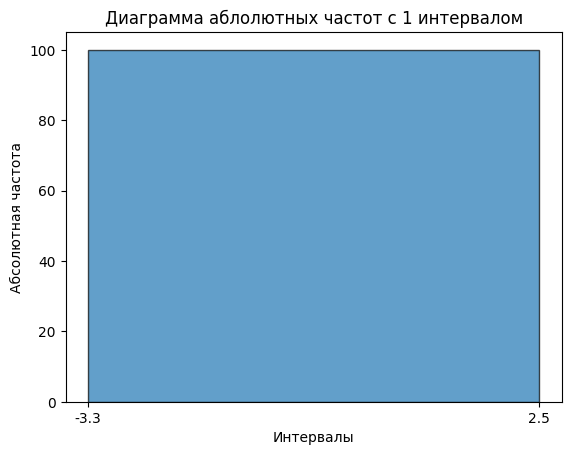

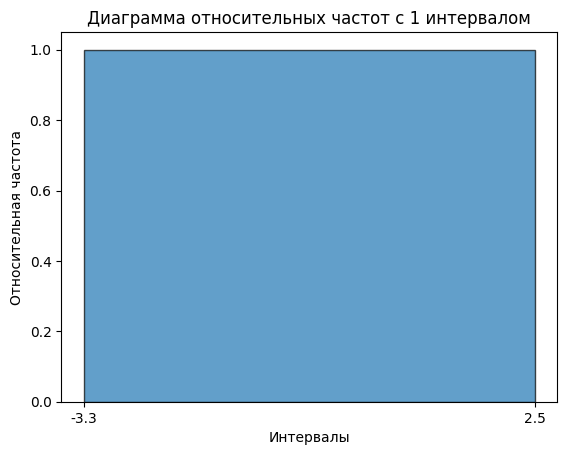

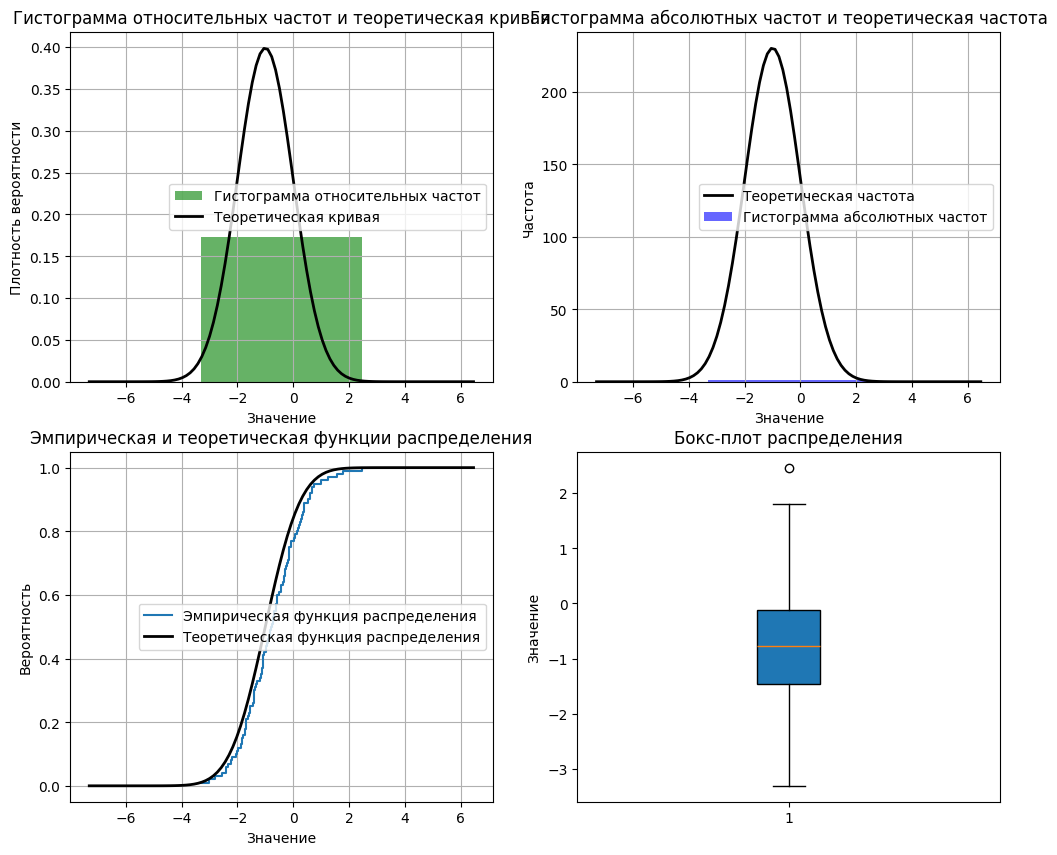

In [5]:
def create_frequency_table(data, a = -1, sigma=1, n_points=100):
    """Создание интервального ряда абсолютных и относительных частот и их графики"""
    interval_num = math.ceil(3.5 * sigma / (n_points ** (1 / 3)))
    freq, bins = np.histogram(data, bins=interval_num)
    print(f"Интервалы: {bins}")
    print(f"Частоты по интервалам: {freq}")
    freq_sum = np.sum(freq)
    print(f"Сумма абсолютных частот: {freq_sum}")
    relative_freq = freq / freq_sum
    print(f"Относительные частоты: {relative_freq}")
    relative_freq_sum = sum(relative_freq)
    print(f"Сумма относительных частот: {relative_freq_sum}")

    # Диаграмма абсолютных частот
    plt.hist(data, bins = bins, edgecolor = "black", alpha = 0.7)
    plt.title(f"Диаграмма аблолютных частот с {interval_num} интервалом")
    plt.xlabel("Интервалы")
    plt.ylabel("Абсолютная частота")
    plt.xticks(bins, np.round(bins, 1))
    plt.show()

    # диаграмма относительных частот
    center_bins = (bins[:-1] + bins[1:]) / 2 # Находим центр каждого интервала
    plt.bar(center_bins, relative_freq, width = np.diff(bins), edgecolor = "black", alpha = 0.7)
    plt.title(f"Диаграмма относительных частот с {interval_num} интервалом")
    plt.xlabel("Интервалы")
    plt.ylabel("Относительная частота")
    plt.xticks(bins, np.round(bins, 1))
    plt.show()

    x = np.linspace(min(data) - 4*sigma, max(data) + 4*sigma, 100)
    theoretical_pdf = sts.norm.pdf(x, loc=a, scale=sigma)
    theoretical_cdf = sts.norm.cdf(x, loc=a, scale=sigma)

    # 1. Гистограмма относительных частот и теоретическая кривая
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label='Гистограмма относительных частот')
    plt.plot(x, theoretical_pdf, 'k', linewidth=2, label='Теоретическая кривая')
    plt.title('Гистограмма относительных частот и теоретическая кривая')
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid()

    # 2. Гистограмма абсолютных частот и теоретическая частота
    plt.subplot(2, 2, 2)
    counts, bins = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.bar(bin_centers, counts / n_points, width=bins[1] - bins[0], alpha=0.6, color='b', label='Гистограмма абсолютных частот')
    plt.plot(x, theoretical_pdf * n_points * (bins[1] - bins[0]), 'k', linewidth=2, label='Теоретическая частота')
    plt.title('Гистограмма абсолютных частот и теоретическая частота')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()

    # 3. Эмпирическая функция распределения и теоретическая функция
    plt.subplot(2, 2, 3)
    sorted_data = np.sort(data)
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.step(sorted_data, empirical_cdf, label='Эмпирическая функция распределения', where='post')
    plt.plot(x, theoretical_cdf, 'k', linewidth=2, label='Теоретическая функция распределения')
    plt.title('Эмпирическая и теоретическая функции распределения')
    plt.xlabel('Значение')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.grid()

    # 4. Бокс-плот
    plt.subplot(2, 2, 4)
    plt.boxplot(data, vert=True, patch_artist=True)
    plt.title('Бокс-плот распределения')
    plt.ylabel('Значение')
    
create_frequency_table(data)

In [211]:
def probability_assessment(data, a = - 1, sigma = 1, q = 1):
    lower = (a - q) / sigma
    upper = (a + q) / sigma

    probability = sts.norm.cdf(upper) - sts.norm.cdf(lower)
    print(f"Вероятность P(|X - MX| < {q}*sigma): {probability}")

    # количество элементов, удовлетворяющих условию
    count_within_bounds = np.sum(np.abs(data - a) < q * sigma)

    probability_estimate = count_within_bounds / len(data)

    print(f"Оценка вероятности P(|X - MX| < q*sigma): {probability_estimate}")
probability_assessment(data)

Вероятность P(|X - MX| < 1*sigma): 0.4772498680518208
Оценка вероятности P(|X - MX| < q*sigma): 0.66


In [210]:
data1 = normal_distribution(n_points=5000)
probability_assessment(data1)

Вероятность P(|X - MX| < 1*sigma): 0.4772498680518208
Оценка вероятности P(|X - MX| < q*sigma): 0.6798


In [213]:
def compute_statistic(data):
    """Точечные оценки параметров распределения"""
    n = len(data)
    mean_estimate = np.mean(data)  # Математическое ожидание
    median_estimate = np.median(data)  # Медиана
    variance_estimate = np.var(data, ddof=1)  # Выборочная дисперсия
    std_dev_estimate = np.sqrt(variance_estimate)  # Стандартное отклонение
    
    # Коэффициент ассиметрии
    skewness_estimate = np.mean(((data - mean_estimate) / std_dev_estimate) ** 3)
    
    # Эксцесс
    kurtosis_estimate = np.mean(((data - mean_estimate) / std_dev_estimate) ** 4) - 3
    
    return {
        "mean": mean_estimate,
        "median": median_estimate,
        "variance": variance_estimate,
        "std_dev": std_dev_estimate,
        "skewness": skewness_estimate,
        "kurtosis": kurtosis_estimate
    }
print(compute_statistic(data))
print(compute_statistic(data1))

{'mean': -1.1439702693615021, 'median': -1.1112781036560904, 'variance': 0.9148164464433077, 'std_dev': 0.9564603736921398, 'skewness': -0.046445581122966505, 'kurtosis': -0.8559936936525872}
{'mean': -0.9942724582071911, 'median': -1.0007366264044437, 'variance': 1.0092094344634643, 'std_dev': 1.0045941640600269, 'skewness': 0.04254943027672625, 'kurtosis': -0.02013599452342074}
